In [14]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import abc
from IPython.display import clear_output

In [15]:
class Break(Exception):
    pass

class Cant_Perform_Exception(Exception):
    pass

class Not_Implemented(Exception):
    pass

In [16]:
class Shape_Menu(metaclass= abc.ABCMeta):
    def __init__(self,X,Y,labels,shape):
        self.shape=shape
        points=pd.DataFrame({"X":X,"Y":Y,"labels":labels})
        points=points.append(points.iloc[0])
        self.dataframe = points
        points=None
        self.functions={
            1:self.identity,
            2: self.rotation,
            3: self.reflection,
            4: self.break_Exception
        }
    
    def shape_Menu(self):
        print('''Enter what type of symmetry you want: \n
        1. identity\n
        2. proper rotation through an angle theta\n
        3. reflection\n
        4. change shape\n
        5. exit ''')
        option=take_input(5)
        self.functions.get(option)()
    
    def break_Exception(self):
        raise Break()
    
    @abc.abstractmethod
    def rotation(self):
        raise Not_Implemented()
    
    @abc.abstractmethod
    def reflection(self):
        pass
    
    def call(self,func,limit):
        option=take_input(limit)
        func(option,limit)
        self.show()
    
    def identity(self):
        pass
    
    def rotate(self,times,limit):
#         To get out of while
        if (times == limit-2):
            raise Break()
#         To avoid rotating for 360
        if (times!=limit-1):
            for _ in range(0,times):
                for index in range(0,self.dataframe.shape[0]-1):
                    self.dataframe.labels.iloc[index]=self.dataframe.labels.iloc[index+1]
                self.dataframe.labels.iloc[self.dataframe.shape[0]-1]=self.dataframe.labels.iloc[0]
    
    @abc.abstractmethod
    def rotation(self):
        pass
    
    def show(self):
        plt.figure(figsize=(6,6))
        plt.plot(self.dataframe.X,self.dataframe.Y)
        plt.title('symmetry of different shapes')
        plt.xlabel('x axis')
        plt.ylabel('y axis')
    # Its for printing the labels and numbers on the graph
        for index,point in enumerate(self.dataframe[:-1].labels):
            plt.scatter(self.dataframe.X[index],self.dataframe.Y[index])
            plt.annotate(point+"("+str(self.dataframe.X.iloc[index])+","+str(self.dataframe.Y.iloc[index])+")", # this is the text
                     (self.dataframe.X.iloc[index],self.dataframe.Y.iloc[index]), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,6), # distance from text to points (x,y)
                     ha='center')
        plt.pause(0.05)
        plt.close()

In [17]:
class Reflection:
    
    # For triangles reflection with X keeping index zero constant
    @staticmethod
    def keepXContant(points):
        _temp=points.labels.iloc[1];
        points.labels.iloc[1]=points.labels.iloc[2];
        points.labels.iloc[2]=_temp
        points.iloc[points.shape[0]-1]=points.iloc[0]
        return points
        
    # For triangles keep second cord as it is
    @staticmethod
    def keepYContant(points):
        _temp=points.labels.iloc[0];
        points.labels.iloc[0]=points.labels.iloc[2];
        points.labels.iloc[2]=_temp
        return points
    
    # For triangles
    @staticmethod
    def keepZContant(points):
        _temp=points.labels.iloc[0];
        points.labels.iloc[0]=points.labels.iloc[1];
        points.labels.iloc[1]=_temp
        return points


In [18]:
class triangle(Shape_Menu):
    def __init__(self):
        super().__init__([0,3,1.5], [0,0,3], ["A","B","C"], "triangle")
        self.reflections={
            1: Reflection.keepXContant,
            2: Reflection.keepYContant,
            3: Reflection.keepZContant,
        }
        
    def rotation(self):
        print('''How much you want to rotate\n
        1. 120 degree\n
        2. 240 degree\n
        3. 360 degree\n
        4. change shape\n
        5. exit ''')
        limit=5
        self.call(self.rotate,limit)
        
    def reflection(self):
        print('''Reflection with which Axis\n
        1. X axis\n
        2. Y axis\n
        3. Z axis\n
        4. change shape\n
        5. exit
        ''')
        limit=5
        option=take_input(limit)
        if option == limit-1:
            raise Break()
        self.reflections.get(option)(self.dataframe)
            
class square(Shape_Menu):
    def __init__(self):
        super().__init__([0,2,2,0], [0,0,2,2], ["A","B","C","D"], "square")
        
    def rotation(self):
        print('''How much you want to rotate\n
        1. 90 degree\n
        2. 180 degree\n
        3. 270 degree\n
        4. 360 degree\n
        5. change shape\n
        6. exit ''')
        limit = 6
        self.call(self.rotate,limit)
            
    def reflection(self):
        raise Cant_Perform_Exception()
    
    
class hexagon(Shape_Menu):
    def __init__(self):
        super().__init__([0,1,1,0,-1,-1], [0,1,2,3,2,1], ["A","B","C","D","E","F"], "hexagon")
        
    def rotation(self):
        print('''How much you want to rotate\n
        1. 60 degree\n
        2. 120 degree\n
        3. 180 degree\n
        4. 240 degree\n
        5. 300 degree\n
        6. 360 degree\n
        7. change shape\n
        8. exit ''')
        limit = 8
        self.call(self.rotate,limit)
        
    def reflection(self):
        raise Cant_Perform_Exception()
    

In [19]:
shapes={
            1: triangle(),
            2: square(),
            3: hexagon(),
        }
def take_input(limit):
    option=int(input("Enter your input: "))
    while(option>limit or option<1):
        print("Not valid option please choose from above options")
        option=int(input("Enter your input: "))
    if option == limit:
        sys.exit()
    return option

def menu():
    print('''Enter the name of shape on which you want to perfrom operation:\n 
    1.equilateral triangle\n
    2.square\n
    3.hexagon\n
    4.exit''')
    return take_input(4)

def different_shape(shape):
    if shape==4:
        print("Thank you! for your time")
        sys.exit()
    try:
        obj=shapes.get(shape,"Invalid shape")
        return obj
    except Exception:
        pass
    


Enter the name of shape on which you want to perfrom operation:
 
    1.equilateral triangle

    2.square

    3.hexagon

    4.exit


Enter your input:  2


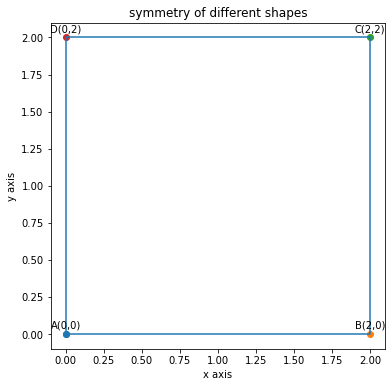

Enter what type of symmetry you want: 

        1. identity

        2. proper rotation through an angle theta

        3. reflection

        4. change shape

        5. exit 


In [ ]:
while(True):
    try:
    #     print(shape)
        shape=menu()
        shape_obj = different_shape(shape)
        shape_obj.show()
        while(True):
            try:
                shape_obj.shape_Menu()
                shape_obj.show()
            except Break as exception:
                break

            except Cant_Perform_Exception as exception:
                print("\n Cant perform this operation on {}\n Please press Enter to proceed further".format(shape_obj.shape))
                input()
        clear_output()
    except SystemExit:
        print("Thank you for trying me!")
        break